# Cardiovascular Risk factors

In [102]:
#importing the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline


In [65]:
# loading the dataset
df=pd.read_csv("cardio_train.csv",header=None)
df



,0
0,id;age;gender;height;weight;ap_hi;ap_lo;choles...
1,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
2,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
3,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
4,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
...,...
69996,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69997,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69998,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69999,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


In [66]:
#expanding the semicolon separated values into specific columns
df_stripped=df[0].str.split(";",expand=True)

In [67]:
# returning the header row
df_stripped.columns=df_stripped.iloc[0]
df_new=df_stripped[1:]

In [68]:
df_new

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
2,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
3,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
4,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
5,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69997,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69998,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69999,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [69]:
# viewing summary of the dataset
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 1 to 70000
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           70000 non-null  object
 1   age          70000 non-null  object
 2   gender       70000 non-null  object
 3   height       70000 non-null  object
 4   weight       70000 non-null  object
 5   ap_hi        70000 non-null  object
 6   ap_lo        70000 non-null  object
 7   cholesterol  70000 non-null  object
 8   gluc         70000 non-null  object
 9   smoke        70000 non-null  object
 10  alco         70000 non-null  object
 11  active       70000 non-null  object
 12  cardio       70000 non-null  object
dtypes: object(13)
memory usage: 6.9+ MB


In [70]:
# checking for duplicates
df_new.duplicated().sum()

0

In [71]:
# casting the numerical columns into integers
df_new[["id","age","height","weight","ap_hi","ap_lo"]]=df_new[["id","age","height","weight","ap_hi","ap_lo"]].astype(float)

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6024\3174380011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[["id","age","height","weight","ap_hi","ap_lo"]]=df_new[["id","age","height","weight","ap_hi","ap_lo"]].astype(float)


In [72]:
# checking for the new data types
df_new.dtypes

0
id             float64
age            float64
gender          object
height         float64
weight         float64
ap_hi          float64
ap_lo          float64
cholesterol     object
gluc            object
smoke           object
alco            object
active          object
cardio          object
dtype: object

In [73]:
# coverting age from days to years
df_new["age"]=df_new["age"]/365
# casting the age column into an integer
df_new["age"]=df_new["age"].astype(int)


C:\Users\HomePC\AppData\Local\Temp\ipykernel_6024\2678828275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["age"]=df_new["age"]/365
C:\Users\HomePC\AppData\Local\Temp\ipykernel_6024\2678828275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["age"]=df_new["age"].astype(int)


In [74]:
# changing height to be in metres
df_new["height"]=df_new["height"]/100
df_new["height"].sample(5)

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6024\722832886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["height"]=df_new["height"]/100


10419    1.77
33235    1.59
12390    1.64
7925     1.73
66548    1.56
Name: height, dtype: float64

In [75]:
# engeneering the BMI column
df_new["BMI"]=df_new["weight"]/(df_new["height"]**2)
df_new["BMI"].sample(5)

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6024\3118166254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["BMI"]=df_new["weight"]/(df_new["height"]**2)


28426    29.402920
67647    26.472107
24961    23.795360
14591    23.795360
45517    34.020346
Name: BMI, dtype: float64

In [76]:
df_clean=df_new.drop(["height","weight"],axis=1).copy()
df_clean

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
1,0.0,50,2,110.0,80.0,1,1,0,0,1,0,21.967120
2,1.0,55,1,140.0,90.0,3,1,0,0,1,1,34.927679
3,2.0,51,1,130.0,70.0,3,1,0,0,0,1,23.507805
4,3.0,48,2,150.0,100.0,1,1,0,0,1,1,28.710479
5,4.0,47,1,100.0,60.0,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
69996,99993.0,52,2,120.0,80.0,1,1,1,0,1,0,26.927438
69997,99995.0,61,1,140.0,90.0,2,2,0,0,1,1,50.472681
69998,99996.0,52,2,180.0,90.0,3,1,0,1,0,1,31.353579
69999,99998.0,61,1,135.0,80.0,1,2,0,0,0,1,27.099251


## **Exploratory Data Analysis**

In [78]:
# describing the numerical columns
df_clean.describe()

,id,age,ap_hi,ap_lo,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,128.817286,96.630414,27.556513
std,28851.302323,6.766774,154.011419,188.472530,6.091511
min,0.000000,29.000000,-150.000000,-70.000000,3.471784
25%,25006.750000,48.000000,120.000000,80.000000,23.875115
50%,50001.500000,53.000000,120.000000,80.000000,26.374068
75%,74889.250000,58.000000,140.000000,90.000000,30.222222
max,99999.000000,64.000000,16020.000000,11000.000000,298.666667


C:\Users\HomePC\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


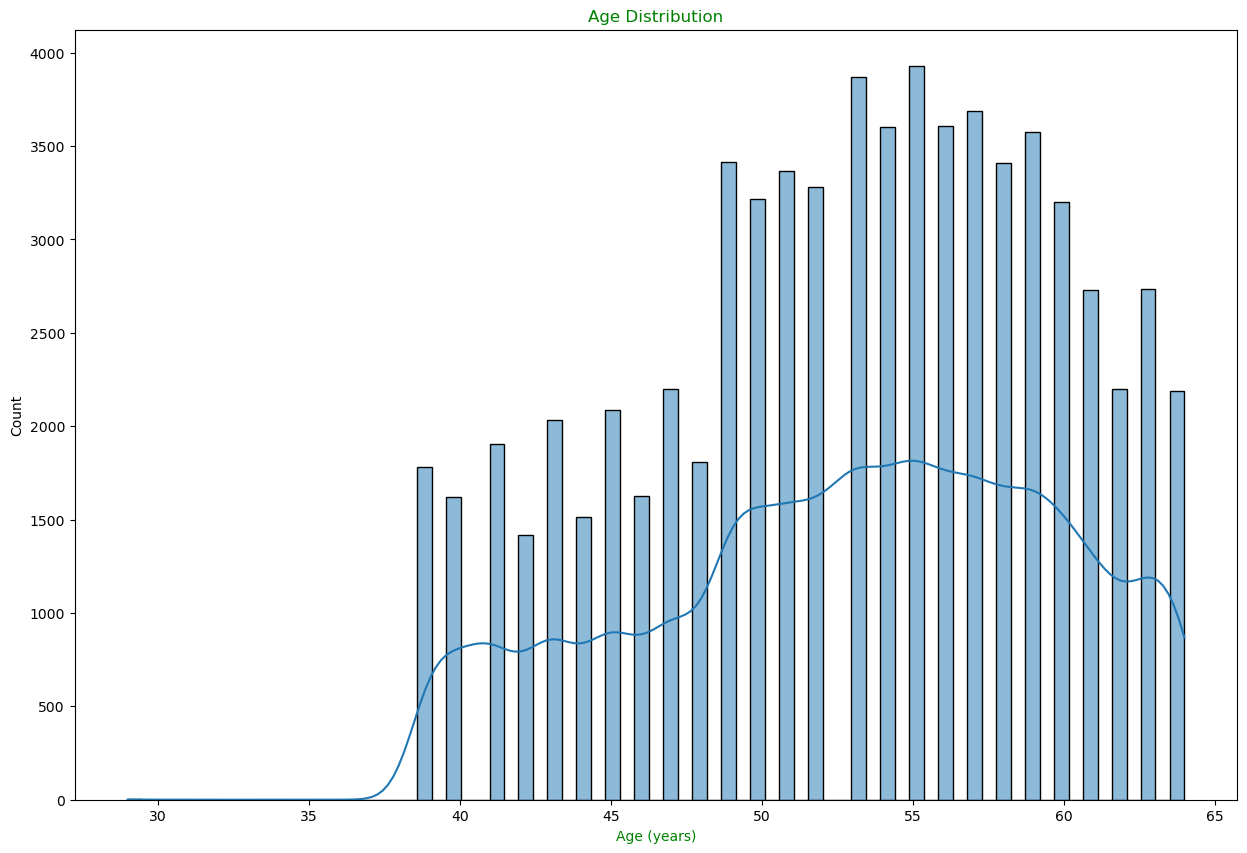

In [87]:
# Plot histogram of age in years
plt.figure(figsize=(15,10))
sns.histplot(x="age", data=df_clean,kde=True)
plt.xlabel("Age (years)",color="g")
plt.title("Age Distribution",color="g")
plt.show()

We observe that the **age** variable is approximately **normally distributed**, with most values symmetrically centered around the **mean**. This suggests that age follows a bell-shaped distribution, which is useful for statistical modeling and inference.


C:\Users\HomePC\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


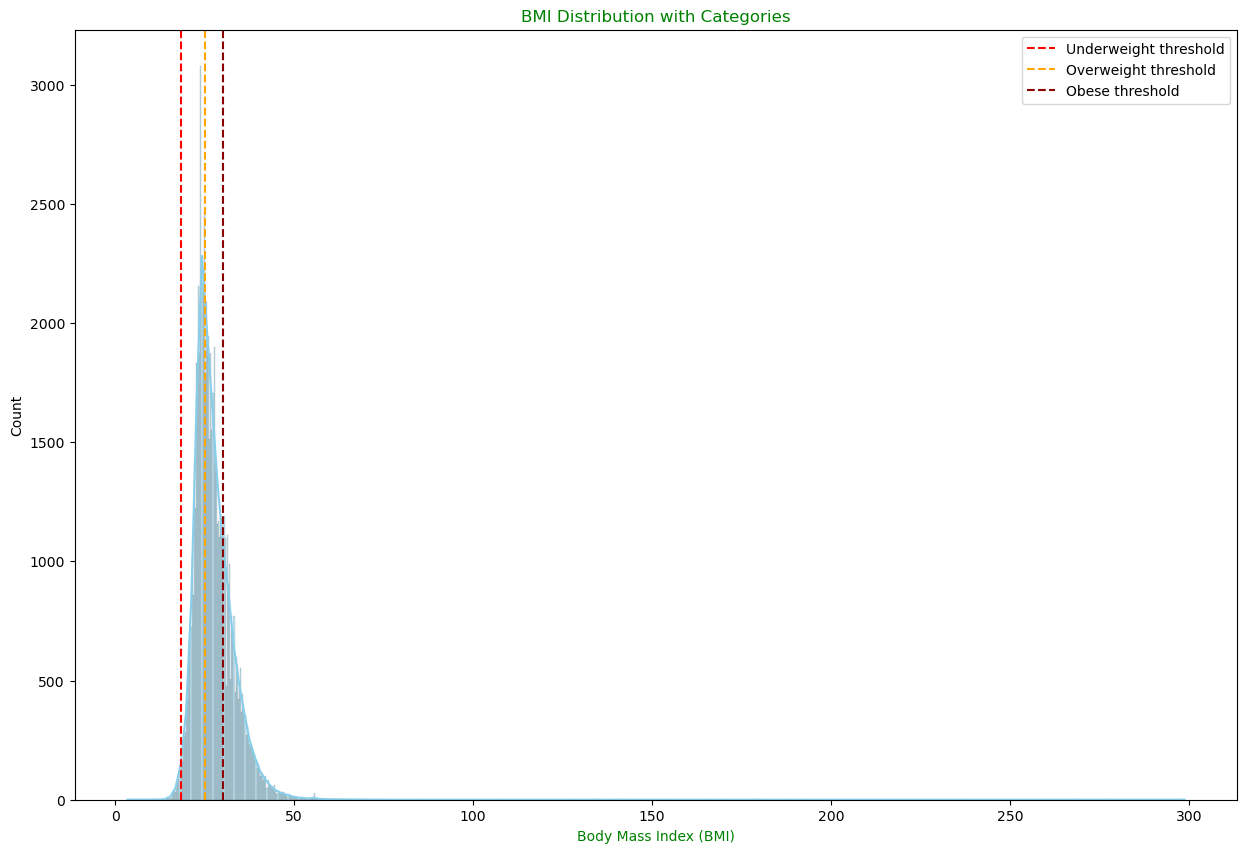

In [89]:

# Plot BMI histogram
plt.figure(figsize=(15,10))
sns.histplot(x="BMI", data=df_clean, kde=True, color='skyblue')

# Add vertical lines for category thresholds
plt.axvline(x=18.5, color='red', linestyle='--', label='Underweight threshold')
plt.axvline(x=25, color='orange', linestyle='--', label='Overweight threshold')
plt.axvline(x=30, color='darkred', linestyle='--', label='Obese threshold')

# Customize plot
plt.xlabel("Body Mass Index (BMI)",color="g")
plt.title("BMI Distribution with Categories",color="g")
plt.legend()
plt.show()

 The **BMI** variable appears to be **normally distributed**, with most values symmetrically centered around the **overweight threshold**. 


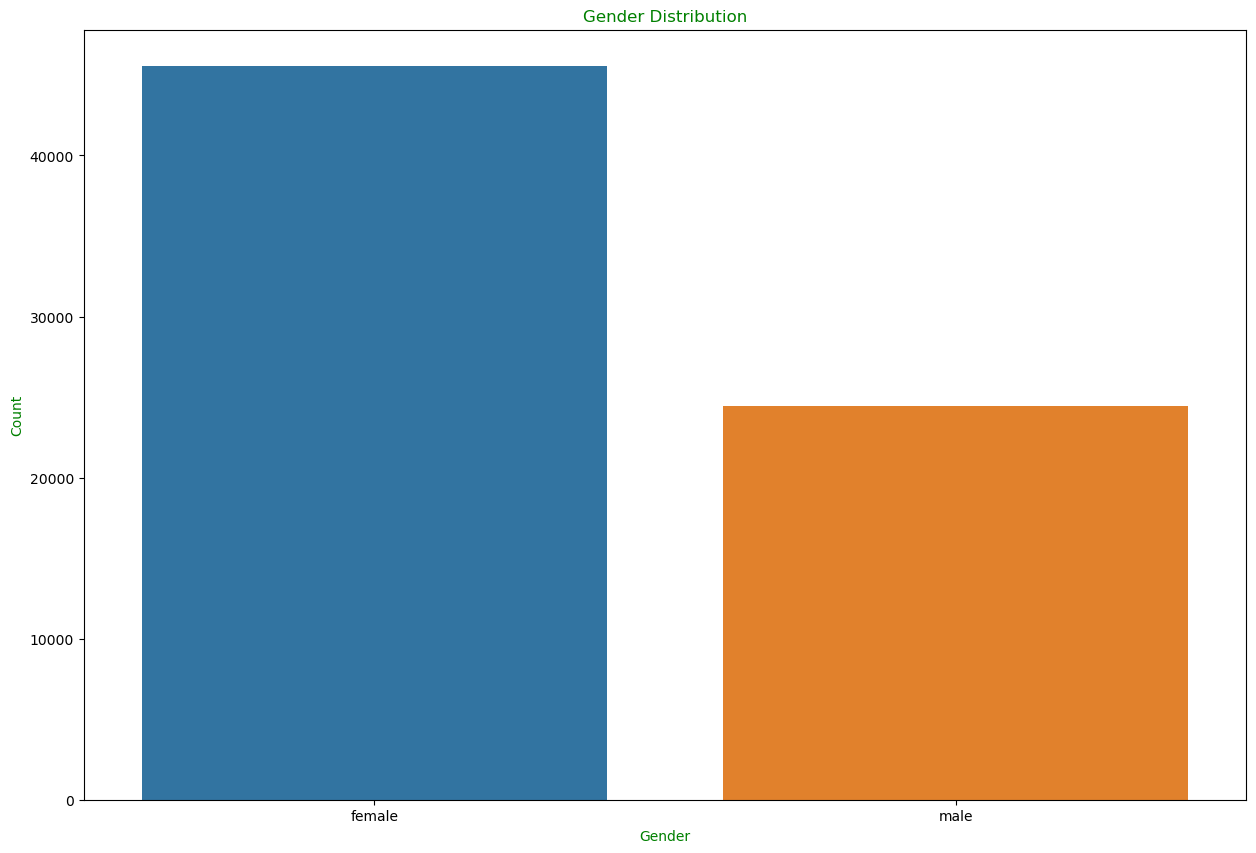

In [141]:
# Create a bar plot of gender distribution
plt.figure(figsize=(15, 10))  
sns.barplot(x=gender_value_counts.index, y=gender_value_counts.values)

# Add labels and title
plt.xlabel("Gender",color="g")
plt.ylabel("Count",color="g")
plt.title("Gender Distribution",color="g")
plt.xticks([0,1],["female","male"])
plt.show()


There are significantly more records for **females** than **males** in the dataset. This imbalance could **skew the analysis**, particularly in any comparisons or models involving gender as a factor.


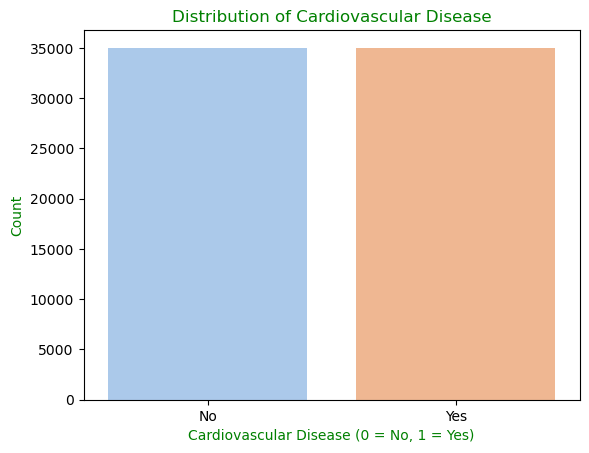

In [100]:
# Get value counts of the target variable
cardio_counts = df_clean["cardio"].value_counts()

# Create the figure and bar plot
plt.Figure(figsize=(10, 6))  
sns.barplot(x=cardio_counts.index, y=cardio_counts.values, palette="pastel")

# Add labels and title
plt.xlabel("Cardiovascular Disease (0 = No, 1 = Yes)",color="g")
plt.ylabel("Count",color="g")
plt.title("Distribution of Cardiovascular Disease",color="g")
plt.xticks([0, 1], ["No", "Yes"])

plt.show()


The dataset contains an approximately **equal number of individuals with and without cardiovascular disease**, indicating that the target variable is **balanced**. This is beneficial for training machine learning models, as it reduces the risk of bias toward one class.


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,,,,,,,,,,,,
id,1.000000,0.003814,0.003502,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,-0.001377
age,0.003814,1.000000,-0.022913,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985,0.085404
gender,0.003502,-0.022913,1.000000,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.096529
ap_hi,0.003356,0.020854,0.006005,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.024852
ap_lo,-0.002529,0.017620,0.015254,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.035345
cholesterol,0.006106,0.154012,-0.035821,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.146270
gluc,0.002467,0.098388,-0.020491,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.101390
smoke,-0.003699,-0.047649,0.338135,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.027215
alco,0.001210,-0.029756,0.170966,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,0.014394


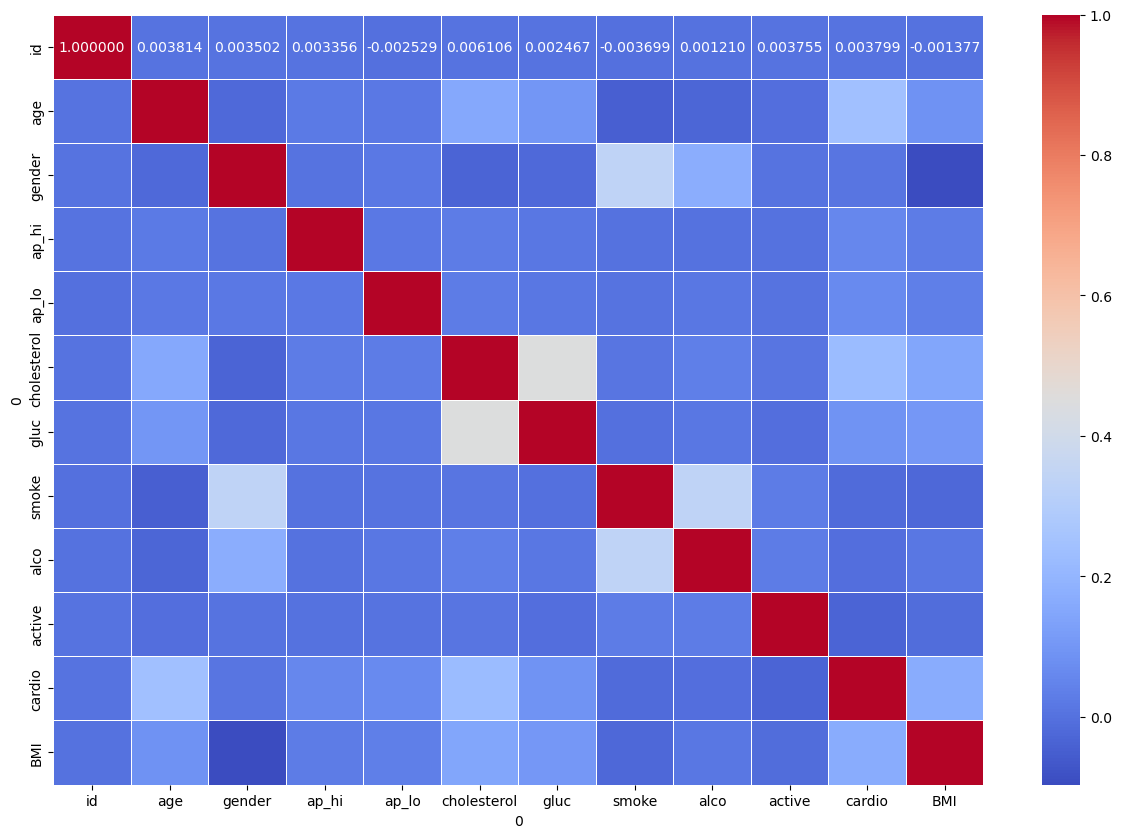

In [113]:
# plotting a correlation matrix
correlation_matrix=df_clean.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",linewidths=0.5,fmt='2f')
correlation_matrix

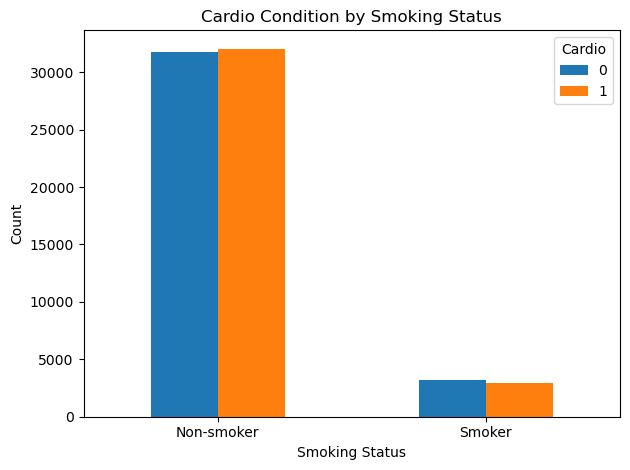

In [142]:
# plotting bar graph of smokers vs cardio
grouped_smoker = df_clean.groupby(["smoke", "cardio"]).size().unstack()
ax = grouped_smoker.plot(kind="bar")

# Set custom x-axis labels
ax.set_xticklabels(["Non-smoker", "Smoker"], rotation=0)
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.title("Cardio Condition by Smoking Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

We observe that **smokers and non-smokers exhibit a similar risk** of developing cardiovascular disease in this dataset. This suggests that, based on the available data, **smoking may not be a strong differentiating factor** for cardiovascular risk, though this could be influenced by other confounding variables.


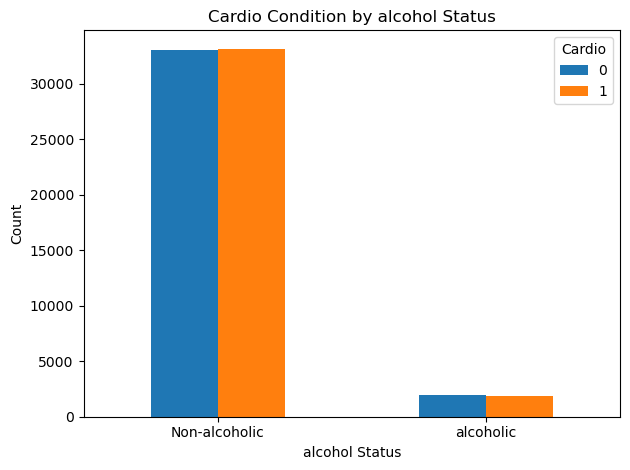

In [143]:
# ploting bar graph of alcohol vs cardio
grouped_alcohol = df_clean.groupby(["alco", "cardio"]).size().unstack()
ax = grouped_alcohol.plot(kind="bar")

# Set custom x-axis labels
ax.set_xticklabels(["Non-alcoholic", "alcoholic"], rotation=0)
plt.xlabel("alcohol Status")
plt.ylabel("Count")
plt.title("Cardio Condition by alcohol Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

The data shows that **alcoholics and non-alcoholics have a similar risk** of developing cardiovascular disease. This suggests that **alcohol consumption may not be a distinguishing factor** for cardiovascular risk in this dataset, although other underlying variables could be at play.


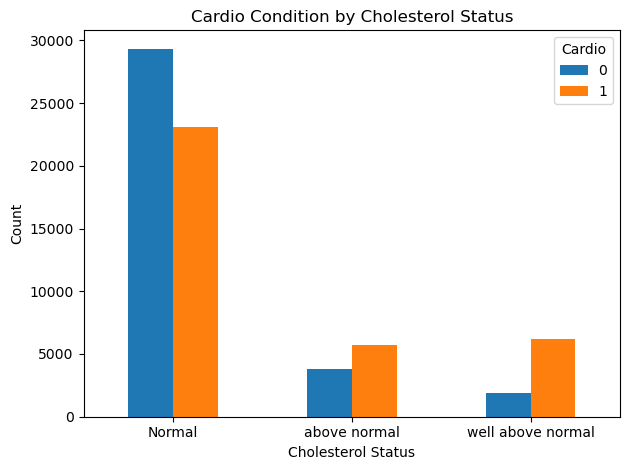

In [145]:
# plotting bar graph of smokers vs cardio
grouped_chole = df_clean.groupby(["cholesterol", "cardio"]).size().unstack()
ax = grouped_chole.plot(kind="bar")

# Set custom x-axis labels
ax.set_xticklabels(["Normal", "above normal","well above normal"], rotation=0)
plt.xlabel("Cholesterol Status")
plt.ylabel("Count")
plt.title("Cardio Condition by Cholesterol Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

From the plot, we observe that individuals with **normal cholesterol levels** are at a **lower risk** of developing cardiovascular disease. In contrast, those with **well above normal** cholesterol levels face the **highest risk**, followed by those with **above normal** levels. This suggests a strong positive correlation between elevated cholesterol and cardiovascular risk.



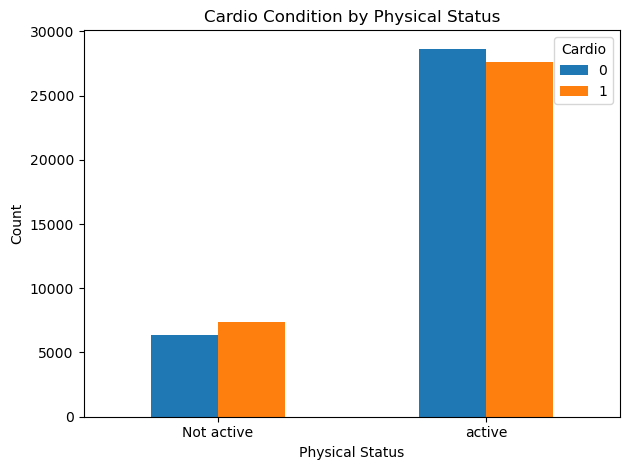

In [146]:
# plotting bar graph of physical activity vs cardio condition
grouped_phyc = df_clean.groupby(["active", "cardio"]).size().unstack()
ax = grouped_phyc.plot(kind="bar")

# Set custom x-axis labels
ax.set_xticklabels(["Not active", "active"], rotation=0)
plt.xlabel("Physical Status")
plt.ylabel("Count")
plt.title("Cardio Condition by Physical Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

From the plot, we observe that individuals who are **not physically active** have a **higher risk** of developing cardiovascular disease, while those who engage in **regular physical activity** show a **lower risk**. This highlights the potential protective effect of physical activity on heart health.


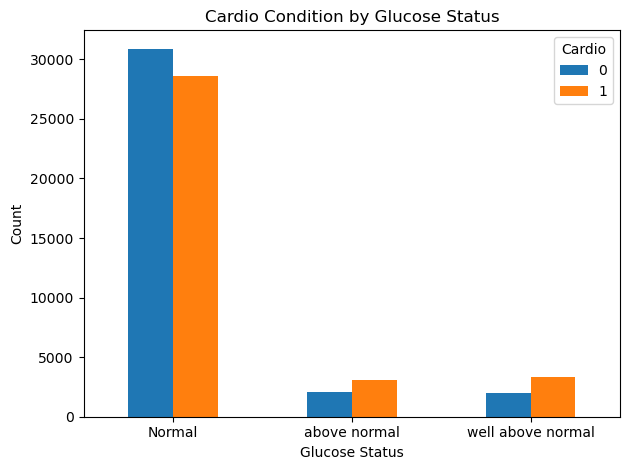

In [147]:
# plotting bar graph of glucose vs cardio
grouped_gluc = df_clean.groupby(["gluc", "cardio"]).size().unstack()
ax = grouped_gluc.plot(kind="bar")

# Set custom x-axis labels
ax.set_xticklabels(["Normal", "above normal","well above normal"], rotation=0)
plt.xlabel("Glucose Status")
plt.ylabel("Count")
plt.title("Cardio Condition by Glucose Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

The plot indicates that individuals with **well above normal glucose levels** face the **highest risk** of developing cardiovascular disease, followed by those with **above normal** glucose levels. In contrast, those with **normal glucose levels** are at a **lower risk**, suggesting a clear association between elevated glucose levels and cardiovascular risk.



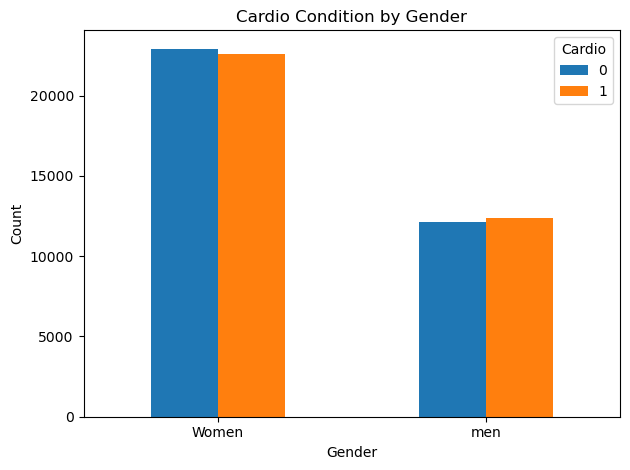

In [148]:
# plotting bar graph of smokers vs cardio
grouped_gender = df_clean.groupby(["gender", "cardio"]).size().unstack()
ax = grouped_gender.plot(kind="bar")

# Set custom x-axis labels
ax.set_xticklabels(["Women", "men"], rotation=0)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Cardio Condition by Gender")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

The data shows that **men have a slightly higher risk** of developing cardiovascular disease compared to women. This suggests a modest gender-related difference in cardiovascular risk within the dataset.


C:\Users\HomePC\AppData\Local\Temp\ipykernel_6024\3402646738.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age=df_clean.groupby(["age_group","cardio"])[["age_group","cardio"]].size().unstack().copy()


Text(0.5, 1.0, 'Cardio Condition by Age Group')

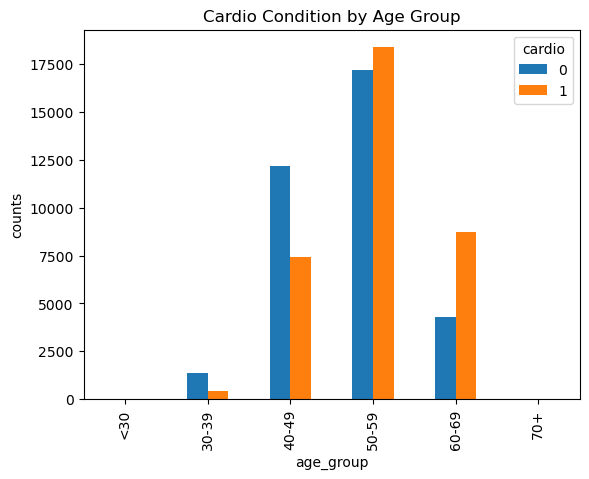

In [140]:

# Define bins and labels
bins = [0, 29, 39, 49, 59, 69, 120]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']

# Create age groups
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels,right=True)
grouped_age=df_clean.groupby(["age_group","cardio"])[["age_group","cardio"]].size().unstack().copy()
ax=grouped_age.plot(kind="bar")
ax.set_ylabel("counts")
ax.set_xlabel("age_group")
ax.set_title("Cardio Condition by Age Group")




The analysis reveals that individuals **above the age of 50** have a **higher risk** of developing cardiovascular disease, with those **over 60 years old** facing the **highest risk**. Conversely, **younger individuals under 50** have a **lower risk** of developing cardiovascular disease, indicating a clear age-related increase in risk.
